In [1]:
from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup
from cryoS2Sdrop.dataloader import singleCET_dataset

import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from torch.utils.data import Dataset, DataLoader

PARENT_PATH = setup.PARENT_PATH
ISONET_PATH = os.path.join(PARENT_PATH, 'data/isoNet/')

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [22]:
cet_path = os.path.join(PARENT_PATH, 'data/raw_cryo-ET/tomo02.mrc') 
p=0.5
my_dataset = singleCET_dataset(cet_path, 10, p=p, n_samples=5)

In [23]:
subtomo, target, mask = my_dataset[0]
subtomo.shape

torch.Size([5, 10, 10, 10])

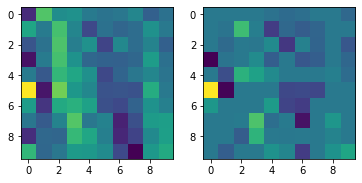

In [25]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(target[0][6] + subtomo[0][6])
ax1.imshow(subtomo[0][6])

In [26]:
my_dataset.data.mean(), my_dataset.data.std()

(tensor(8.5244e-09), tensor(1.))

(array([4.70000000e+01, 8.78000000e+02, 6.74500000e+03, 1.75287000e+05,
        1.48077754e+08, 2.50159652e+08, 1.16540400e+06, 3.17500000e+03,
        4.01000000e+02, 3.30000000e+01]),
 array([-15.919886 , -12.799945 ,  -9.680004 ,  -6.560063 ,  -3.440122 ,
         -0.3201809,   2.79976  ,   5.919701 ,   9.039642 ,  12.159583 ,
         15.279524 ], dtype=float32),
 <BarContainer object of 10 artists>)

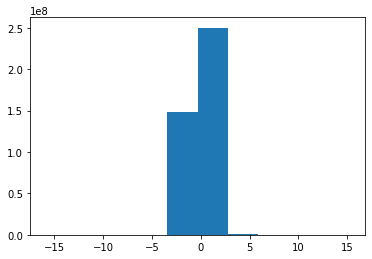

In [27]:
plt.hist(my_dataset.data.flatten().numpy())